<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Python - Foundations</center></font></h1>
<h1><center>Python for Visualization - Week 3</center></h1>


<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Barbieri_-_ViaSophia25668.jpg/1024px-Barbieri_-_ViaSophia25668.jpg" width="800" height="400"></center>

<b><h2><center>Tips Case Study</center></h2></b>

### **Context**
A tip is considered as a monetary incentive that is given by the customers or guests for polite, prompt, and efficient service provided by the staff. The practice of giving tips has been continuing for a very long time and has become particularly popular in service industries such as hotels and restaurants.

### **Objective**
Chef's Kitchen is one of the most popular restaurants in the city of San Diego and acts as a one-stop destination for food lovers. The polite and efficient service provided by the restaurant staff often gets them tips from the customer. As a Data Analyst for the restaurant, you have been asked to analyze the data provided to identify the patterns and trends in the revenue and tips received from customers across different demographies and come up with informative visualizations to  convey the insights obtained from the analysis. <br>
<br>
The dataset consists of the following features:

- **order_id**: unique identifier of each order
- **day**: day of the week on which the customer visited the restaurant (Thur/Fri/Sat/Sun)
- **time**: time of the day at which the customer visited the restaurant (Lunch or Dinner)
- **size**: number of people present at the table
- **smoker**: whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)
- **sex**: gender of the payer of the bill (Male or Female)
- **total_bill**: the bill amount in dollars
- **tip**: the tip amount in dollars


Let us first import the necessary libraries before starting our analysis.

### **Importing the libraries**

In [38]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

Let us now load the dataset.

### **Loading the dataset**

In [39]:
# Load the dataset
tip_data = pd.read_csv(r"C:\Users\jessi\OneDrive\DataAnalytics\Python\Case Study 1\data\tips.csv")

### **Overview of the dataset**

The initial steps to get an overview of the dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first 5 rows of the dataset**

In [40]:
# Display the first few rows of the dataset
tip_data.head()

,order_id,day,time,size,smoker,sex,total_bill,tip
0,1,Sun,Dinner,2,No,Female,16.99,1.01
1,2,Sun,Dinner,3,No,Male,10.34,1.66
2,3,Sun,Dinner,3,No,Male,21.01,3.50
3,4,Sun,Dinner,2,No,Male,23.68,3.31
4,5,Sun,Dinner,4,No,Female,24.59,3.61


- *The dataset contains information about the customers who are visiting the restaurant*
- *It contains details about the day and time at which the customer has visited the restaurant and gives information about their billing and tip amount.* 

#### **Understanding the shape of the dataset**

In [41]:
# Display the shape of the dataset
print('Shape of the dataset:', tip_data.shape)

Shape of the dataset: (244, 8)


- *There are 244 rows and 8 columns in the dataset.*

#### **Checking the data types of the columns for the dataset**

In [42]:
# Get a concise summary of the DataFrame
tip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


- *The `total_bill`, `tip`, `size` and `order_id` columns are numerical columns while the rest are categorical in nature.*

The primary difference between categorical and object type columns is that categorical columns help to improve the processing speed and reduces the storage space when we are working with a large dataset.

Let us drop the `order_id` column from our dataset as it will not add any value to our analysis since it is an  unique identifier.

In [44]:
# Remove the 'order_id' column if it exists
if 'order_id' in tip_data.columns:
    tip_data.drop('order_id', axis=1, inplace=True)

Let's print the head of the dataset to verify that the `order_id` column has been successfully dropped.

In [45]:
# Display the first few rows of the dataset again to confirm changes
tip_data.head()

,day,time,size,smoker,sex,total_bill,tip
0,Sun,Dinner,2,No,Female,16.99,1.01
1,Sun,Dinner,3,No,Male,10.34,1.66
2,Sun,Dinner,3,No,Male,21.01,3.50
3,Sun,Dinner,2,No,Male,23.68,3.31
4,Sun,Dinner,4,No,Female,24.59,3.61


The `order_id` column has been successfully dropped.

#### **Getting the statistical summary for the dataset**

In [47]:
# Summary statistics for numerical columns
tip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


### Observations:
* Group Size: The median party size is 2, with group sizes ranging from 1 to 6 guests.
* Total Bill: Bills range from approximately `$3` to `$50`. The average bill is around `$19.79`, and half of the bills are below `$17.80`.
* Tip Amount: Tips range from about `$1` to `$10`. The mean and median are both close to `$3`, indicating a fairly symmetric distribution.


### **Now we have got a preliminary idea about the dataset. Let us now see the distribution of each of the columns to get a better understanding. Let us start with the numerical columns and use the histplot and boxplot to plot their distribution.**

#### **Understanding the distribution of `total_bill`**

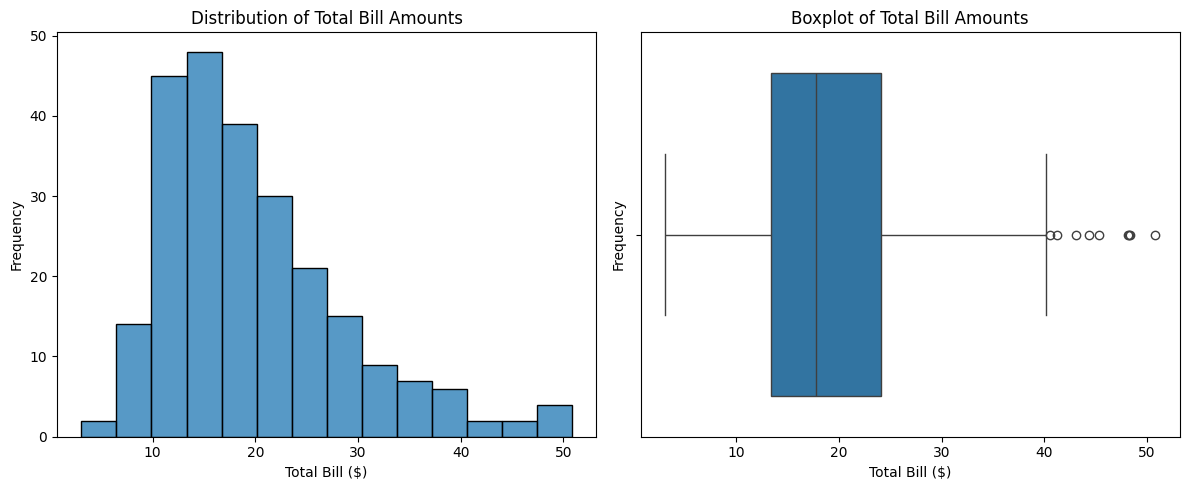

Mean: 19.78594262295082
Median: 17.795
25th Percentile: 13.3475
75th Percentile: 24.127499999999998


In [55]:
# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram on the left
sns.histplot(data=tip_data, x='total_bill', ax=axes[0])
axes[0].set_title('Distribution of Total Bill Amounts')
axes[0].set_xlabel('Total Bill ($)')
axes[0].set_ylabel('Frequency')

# Boxplot on the right
sns.boxplot(data=tip_data, x='total_bill', ax=axes[1])
axes[1].set_title('Boxplot of Total Bill Amounts')
axes[1].set_xlabel('Total Bill ($)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate and print key statistics
print('Mean:', tip_data['total_bill'].mean())
print('Median:', tip_data['total_bill'].median())
print('25th Percentile:', tip_data['total_bill'].quantile(0.25))
print('75th Percentile:', tip_data['total_bill'].quantile(0.75))

### Observations
* The  distribution is slightly right-skewed, indicated by outliers on the higher end.
* The median total bill is approximately `$17.80`, meaning half of the customers paid less than this amount.
* The interquartile range (IQR) spans from about `$13.35` to `$24.13`, capturing the middle 50% of billing amounts.


#### **Understanding the distribution of `tip`**

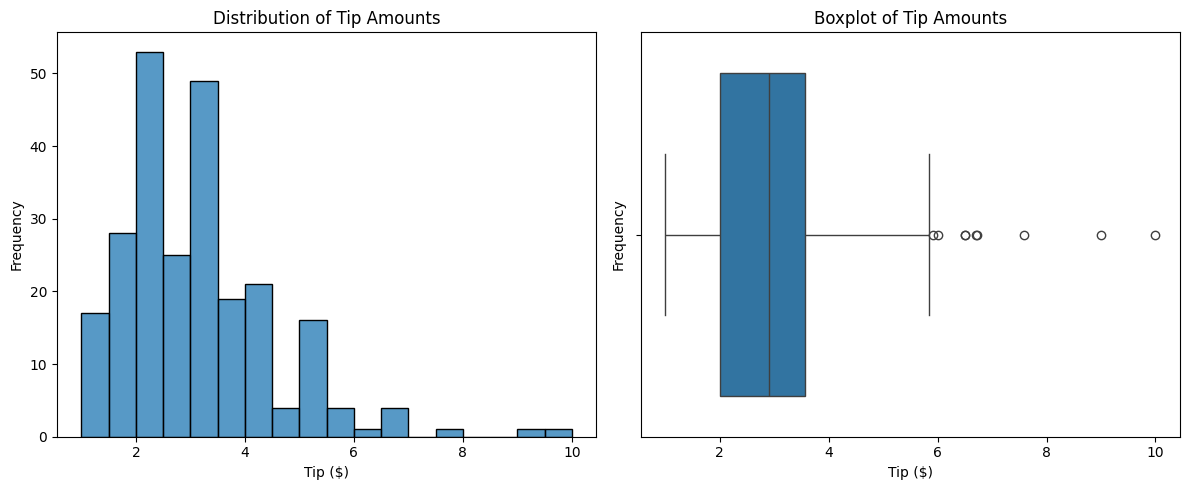

Mean: 2.99827868852459
Median: 2.9
25th Percentile: 2.0
75th Percentile: 3.5625


In [56]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram on the left
sns.histplot(data=tip_data, x='tip', ax=axes[0])
axes[0].set_title('Distribution of Tip Amounts')
axes[0].set_xlabel('Tip ($)')
axes[0].set_ylabel('Frequency')

# Boxplot on the right
sns.boxplot(data=tip_data, x='tip', ax=axes[1])
axes[1].set_title('Boxplot of Tip Amounts')
axes[1].set_xlabel('Tip ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and print key statistics
print('Mean:', tip_data['tip'].mean())
print('Median:', tip_data['tip'].median())
print('25th Percentile:', tip_data['tip'].quantile(0.25))
print('75th Percentile:', tip_data['tip'].quantile(0.75))

### Observations:
* The distribution is slightly right-skewed, indicated by outliers on the higher end.
* The median tip is approximately `$2.90`, meaning half of the customers paid less than this amount.
* The interquartile range (IQR) spans from about `$2.00` to `$3.56`, capturing the middle 50% of tip amounts.

#### **Understanding the distribution of `size`**

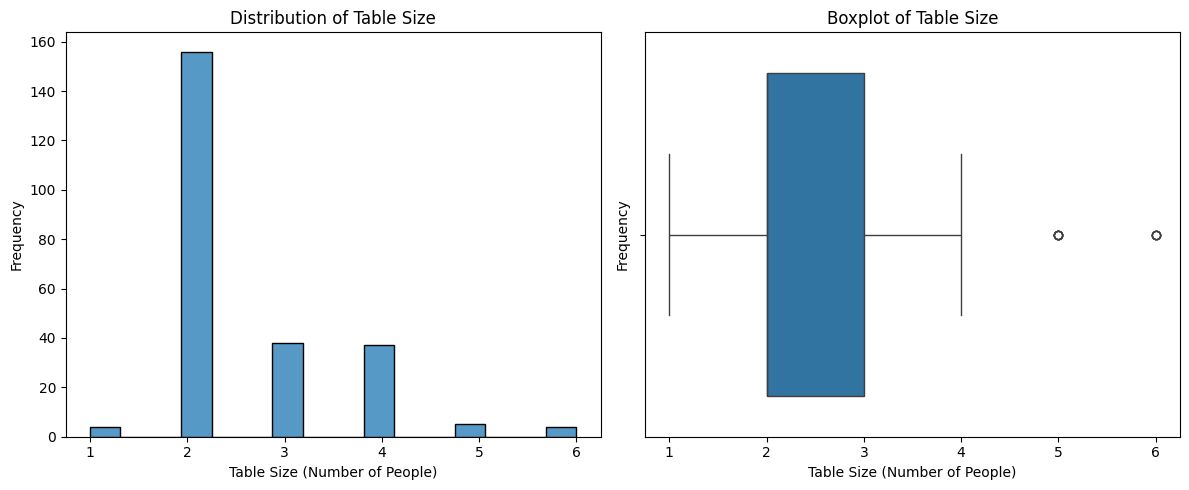

Mean: 2.569672131147541
Median: 2.0
25th Percentile: 2.0
75th Percentile: 3.0


In [57]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram on the left
sns.histplot(data=tip_data, x='size', ax=axes[0])
axes[0].set_title('Distribution of Table Size')
axes[0].set_xlabel('Table Size (Number of People)')
axes[0].set_ylabel('Frequency')

# Boxplot on the right
sns.boxplot(data=tip_data, x='size', ax=axes[1])
axes[1].set_title('Boxplot of Table Size')
axes[1].set_xlabel('Table Size (Number of People)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and print key statistics
print('Mean:', tip_data['size'].mean())
print('Median:', tip_data['size'].median())
print('25th Percentile:', tip_data['size'].quantile(0.25))
print('75th Percentile:', tip_data['size'].quantile(0.75))

### Observations:
* The distribution of table sizes is slightly right-skewed, with outliers at sizes 5 and 6.
* The median table size is 2, and the histogram confirms that this is the most frequent group size (with a count of approximately 155).
* The interquartile range (IQR) spans from 2 to 3, meaning half of the groups consist of either 2 or 3 people.

### **We have now seen the distribution of the numerical columns. Let us now move on to the categorical columns and use the countplot to see their distribution.**

#### **Understanding the distribution of `day`**

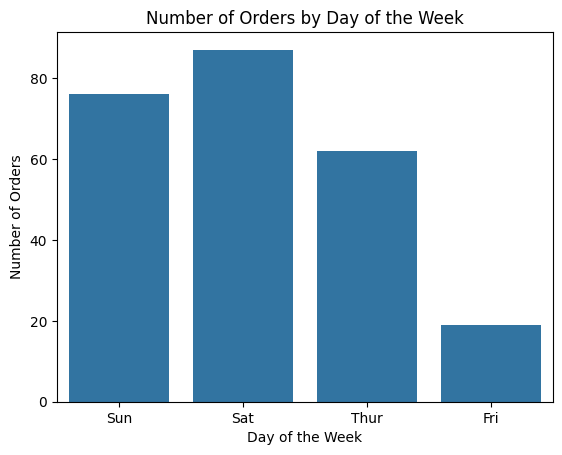

Number of Orders on Saturday: 87
Number of Orders on the weekend: 163
Number of Orders on the weekday: 81


In [62]:
# Count plot for the 'day' column
sns.countplot(data=tip_data, x='day')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show();

print('Number of Orders on Saturday:', tip_data['day'].value_counts()['Sat'])
print('Number of Orders on the weekend:', tip_data['day'].value_counts()['Sat'] + tip_data['day'].value_counts()['Sun'])
print('Number of Orders on the weekday:', tip_data['day'].value_counts()['Thur'] + tip_data['day'].value_counts()['Fri'])

### Observations:
* `Saturday` sees the highest number of orders, with 87 entries.
* The weekend (Saturday and Sunday) accounts for 163 orders, compared to 81 orders on weekdays (Thursday and Friday).

#### **Understanding the distribution of `time`**

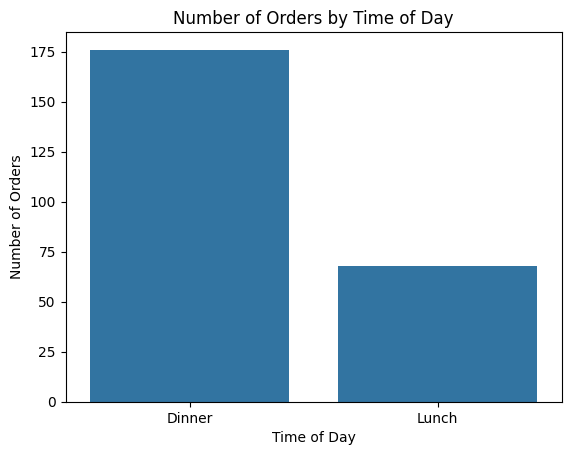

Number of Orders for Dinner: 176
Number of Orders for Lunch: 68
Difference: 108


In [64]:
# Count plot for the 'time' column
sns.countplot(data=tip_data, x='time')
plt.title('Number of Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.show()

print('Number of Orders for Dinner:', tip_data['time'].value_counts()['Dinner'])
print('Number of Orders for Lunch:', tip_data['time'].value_counts()['Lunch'])
print('Difference:', tip_data['time'].value_counts()['Dinner'] - tip_data['time'].value_counts()['Lunch'])

### Observations:
* `Dinner time` sees the highest number of orders, with 176 entries — 108 more than lunch time, which has 68 entries.

#### **Understanding the distribution of `sex`**

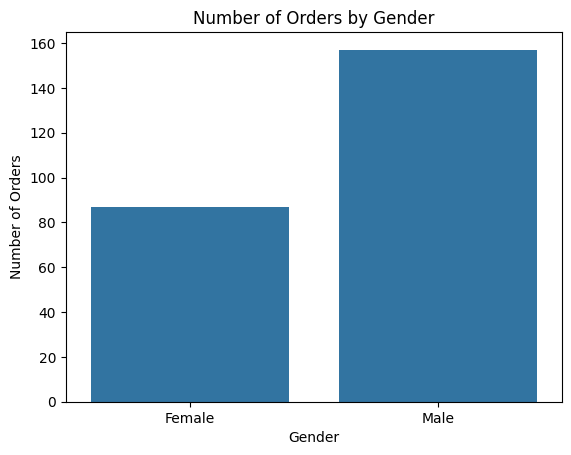

Number of Orders for Males: 157
Number of Orders for Females: 87
Difference: 70


In [66]:
# Count plot for the 'sex' column
sns.countplot(data=tip_data, x='sex')
plt.title('Number of Orders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Orders')
plt.show()

print('Number of Orders for Males:', tip_data['sex'].value_counts()['Male'])
print('Number of Orders for Females:', tip_data['sex'].value_counts()['Female'])
print('Difference:', tip_data['sex'].value_counts()['Male'] - tip_data['sex'].value_counts()['Female'])

### Observations:
* Males see the highest number of orders, with 157 entries — 70 more than Females, which have 87 entries.

#### **Understanding the distribution of `smoker`**

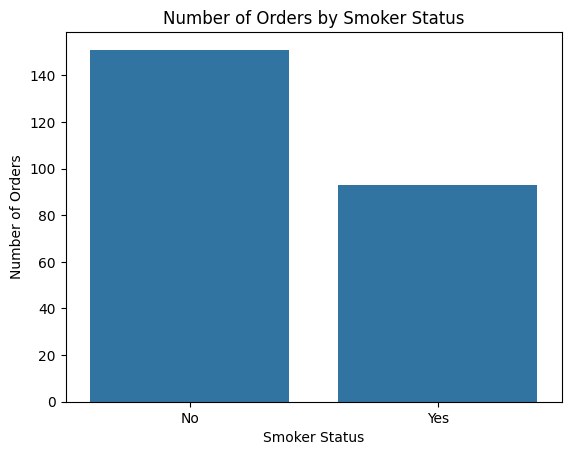

Number of Orders for Smokers: 93
Number of Orders for Non-Smokers: 151
Difference: -58


In [67]:
# Count plot for the 'smoker' column
sns.countplot(data=tip_data, x='smoker')
plt.title('Number of Orders by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Number of Orders')
plt.show()

print('Number of Orders for Smokers:', tip_data['smoker'].value_counts()['Yes'])
print('Number of Orders for Non-Smokers:', tip_data['smoker'].value_counts()['No'])
print('Difference:', tip_data['smoker'].value_counts()['Yes'] - tip_data['smoker'].value_counts()['No'])

### Observations:
* Non-Smokers see the highest number of orders, with 151 entries — 58 more than Smokers, which have 93 entries.

### **Till now we have seen the distribution of the columns individually. Let us now try to see the relation between various columns so that we can find some meaningful patterns and trends from them. Let us use the heatmap to see the correlation between the numerical columns.**

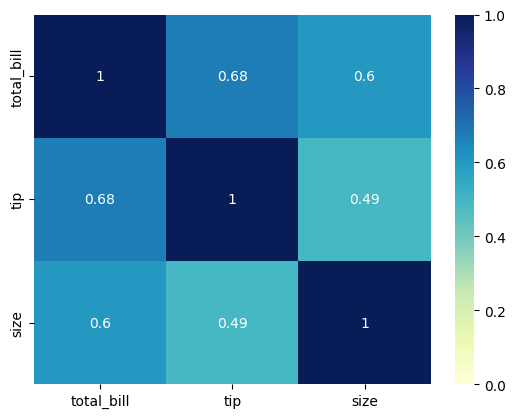

In [69]:
# Correlation heatmap for numerical columns
sns.heatmap(data=tip_data[['total_bill','tip','size']].corr(), annot=True, cmap='YlGnBu', vmin=0, vmax=1);

### Observations:
* `Total bill` is strongly correlated with both `table size` and `tip amount`—larger groups tend to spend more, and higher bills often lead to higher tips.
* `Tip amount` and `table size` show a moderate correlation, suggesting that while larger tables may tip more, the relationship isn’t as strong.

### **We have seen that `total_bill` and `tip` columns are highly correlated with each other. Let us verify this relationship with the help of various plots**

#### **Understanding the relationship between `total_bill` and `tip` using suitable plots**

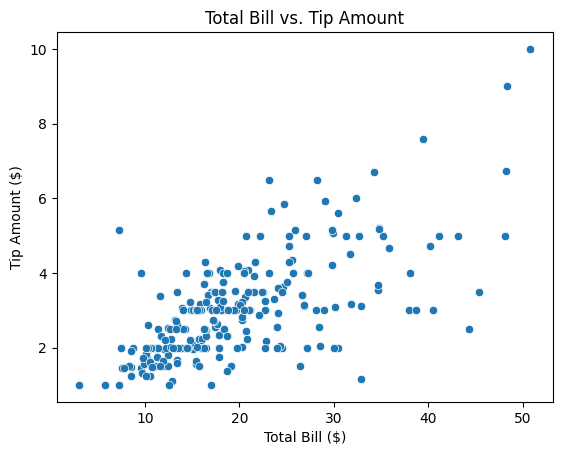

In [70]:
# Scatter plot to visualize the relationship between total_bill and tip
sns.scatterplot(data=tip_data, x='total_bill', y='tip')
plt.title('Total Bill vs. Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.show()

### Observations:
* `Total bill` shows a strong positive correlation with `tip amount`, as confirmed by both the correlation coefficient (0.68) and the scatterplot. This suggests that higher bills tend to result in higher tips.

We can use the joinplot here to see the relationship between `total_bill` and `tip` as well as see their distribution, all combined in the same plot.

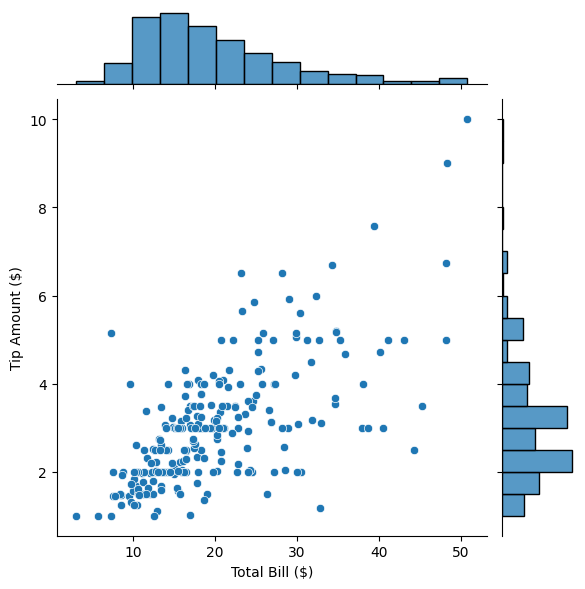

In [ ]:
# Joint plot to visualize the relationship between total_bill and tip
sns.jointplot(data=tip_data, x='total_bill', y='tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.show()

Let us create a hexbin plot by setting **kind="hex"** to take care of the overlapping of points.

- Setting **kind="hex"** actually splits the plotting window into several hexagons and the colour of each hexagon denotes the number of data points in it.

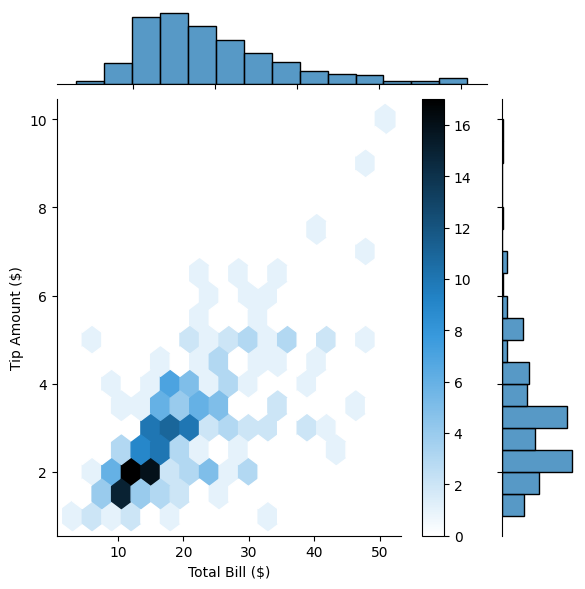

In [73]:
# Hexbin joint plot to visualize the relationship between total_bill and tip
sns.jointplot(data=tip_data, x='total_bill', y='tip', kind='hex')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

### Observations:
* Total Bill: 50% of the values fall between $13.34 and $24.13, representing the interquartile range.
* Tip Amount: 50% of the values fall between $2.00 and $3.56, also within the interquartile range.
* The hexbin joint plot visually reinforces the positive correlation between total bill and tip amount, with darker blue hexagons indicating higher concentrations of data points.

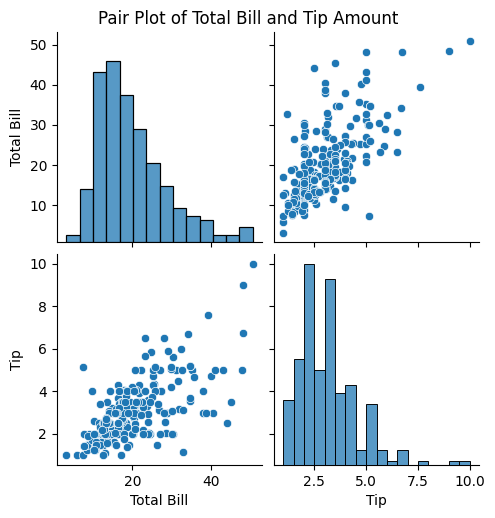

In [76]:
# Create a copy with renamed columns
renamed_data = tip_data[['total_bill', 'tip']].rename(columns={
    'total_bill': 'Total Bill',
    'tip': 'Tip'
})

# Pair plot to visualize relationships between total_bill and tip
sns.pairplot(data = renamed_data)
plt.suptitle('Pair Plot of Total Bill and Tip Amount', y=1.02)
plt.show()

### Observations:
* `Total bill` shows a strong positive correlation with `tip amount`, as confirmed by both the correlation coefficient (0.68) and the pair plots. This indicates that customers tend to tip more when their total bill is higher, reflecting a proportional tipping behavior.

### **Is the relationship between `total_bill` and `tip` valid with respect to the gender of the bill payer, smoking status, days and time at which the customer has visited the restaurant and also the group size?**

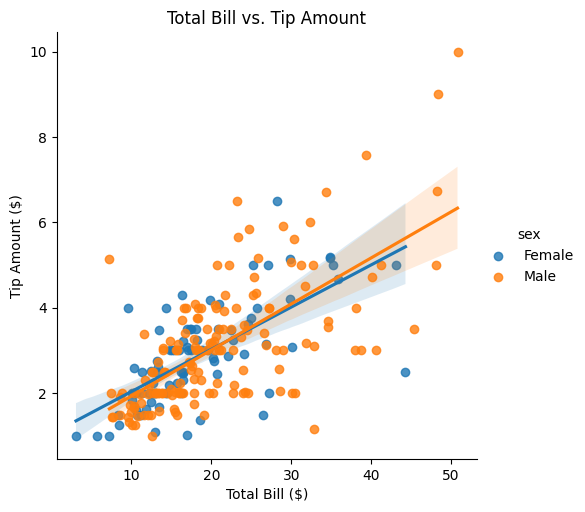

In [78]:
# Linear model plot to visualize the relationship between total_bill and tip, separated by sex
sns.lmplot(data = tip_data, x = 'total_bill', y = 'tip', hue='sex')
plt.title('Total Bill vs. Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip Amount ($)')
plt.show();

### Observations:
* `Total Bill` shows a strong positive correlation with `Tip Amount` for both `Males and Females`, as indicated by the upward-sloping regression lines.
* `Male` customers appear more frequently in transactions with higher total bills and tip amounts, suggesting they may be associated with larger orders or more generous tipping in some cases

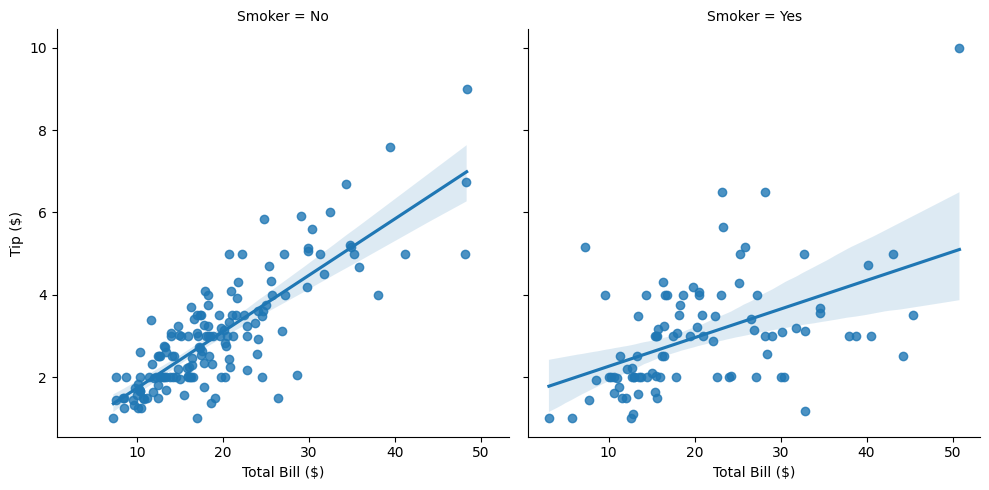

In [ ]:
# Rename columns for plotting
renamed_data = tip_data.rename(columns={
    'total_bill': 'Total Bill ($)',
    'tip': 'Tip ($)',
    'smoker': 'Smoker'
})

# Linear model plot to visualize the relationship between total_bill and tip, separated by smoker status
sns.lmplot(data = renamed_data, x = 'Total Bill ($)', y = 'Tip ($)', col = 'Smoker')
plt.show();

### Observations:
* Non-smoking tables exhibit a steeper upward-sloping regression line compared to smoking tables, indicating a stronger positive relationship between total bill and tip amount among non-smokers.

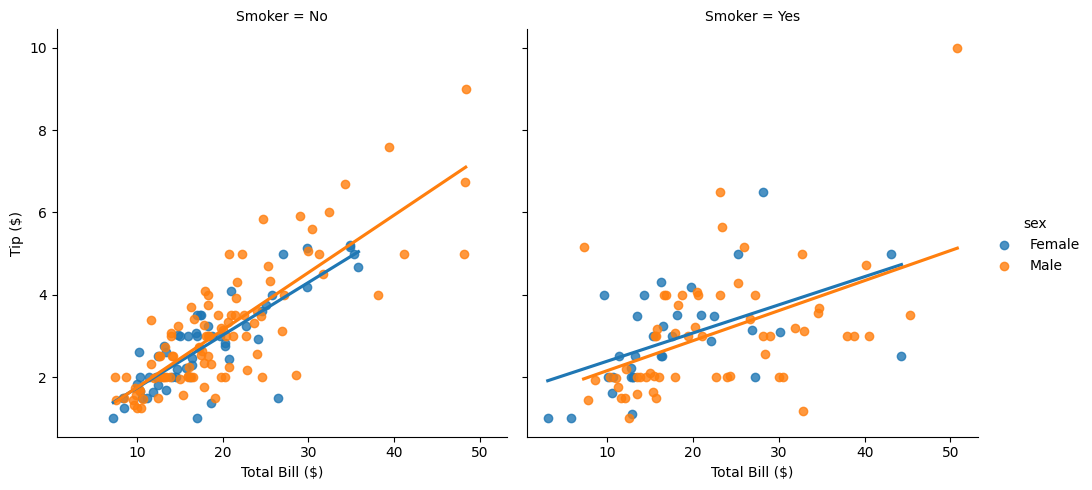

In [88]:
# Rename columns for plotting
renamed_data = tip_data.rename(columns={
    'total_bill': 'Total Bill ($)',
    'tip': 'Tip ($)',
    'smoker': 'Smoker'
})
    
# Linear model plot to visualize the relationship between total_bill and tip, separated by sex and smoker status
sns.lmplot(data=renamed_data, x='Total Bill ($)', y='Tip ($)', hue='sex', col='Smoker', ci=False)
plt.show();

### Observations:
* Male customers at non-smoking tables tend to have higher total bills and tip amounts.

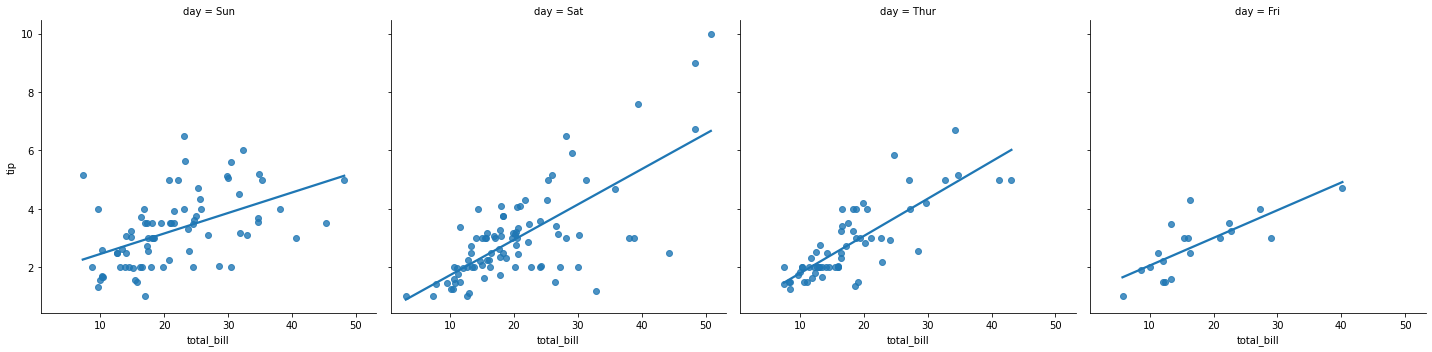

In [ ]:
sns.lmplot(data = tip_data, x = 'total_bill', y = 'tip', col = 'day', ci=False)

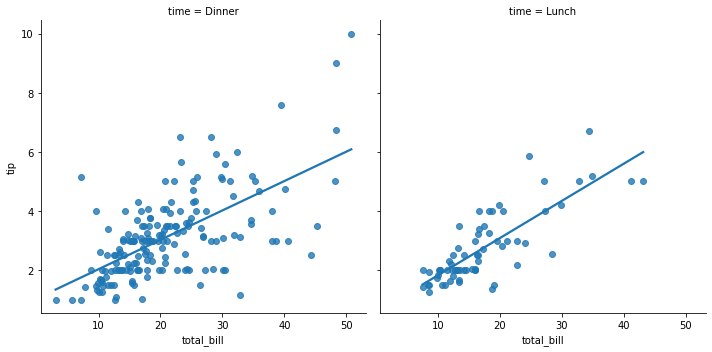

In [28]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'time', ci=False)

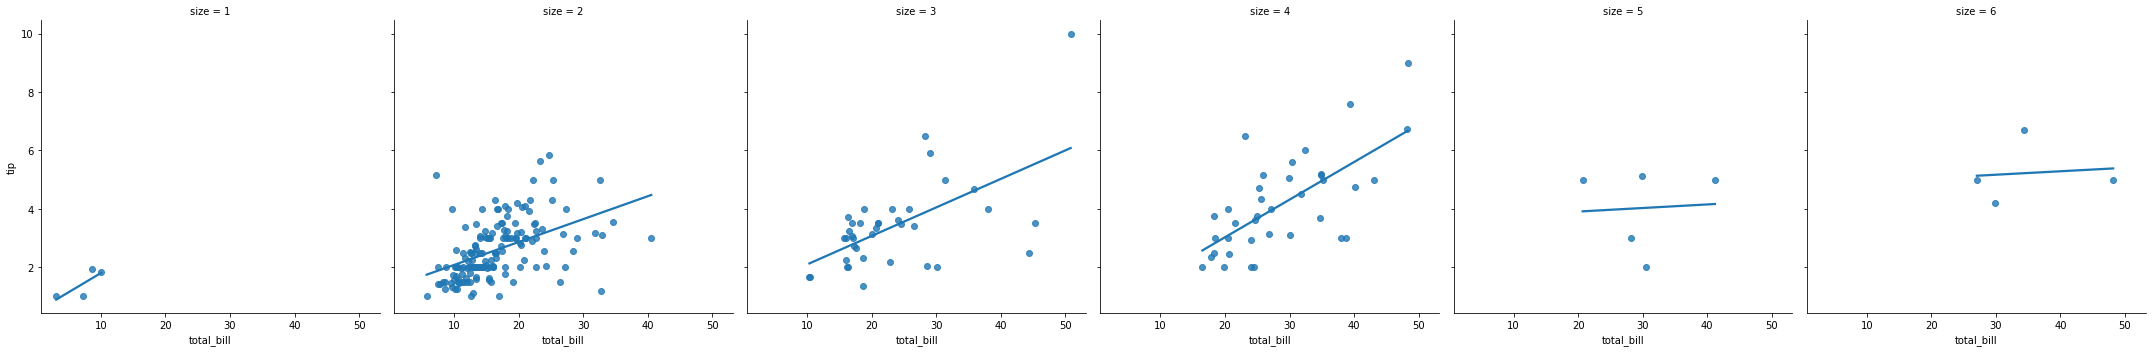

In [29]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'size', ci=False)

- *The relationship between `total_bill` and `tip` is mostly linear with respect to day and time.*
- *However with respect to size of the group, this relationship gets constant as the size of the group increases.*

**We have seen earlier that customers visit Chef's Kitchen across different days of the week.**

### **How does the bill amount and tip vary with respect to the day of visit?**

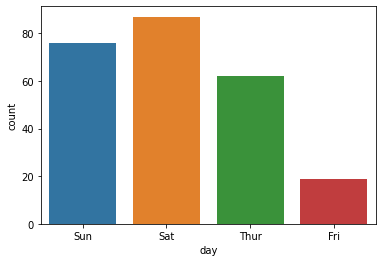

In [30]:
sns.countplot(data=tips, x='day')

- *We can see that the number of orders is higher during the weekends as compared to the weekdays*

**`total_bill`**

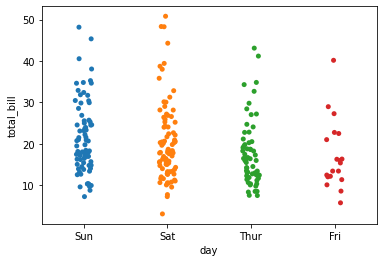

In [31]:
sns.stripplot(data=tips,x='day',y='total_bill',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

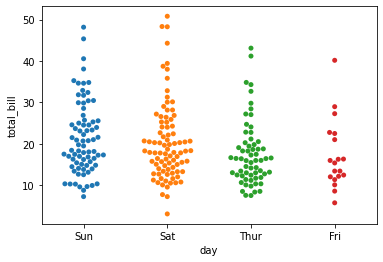

In [32]:
sns.swarmplot(data=tips, x='day',y='total_bill')

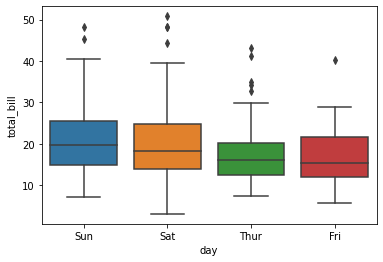

In [33]:
sns.boxplot(data=tips, x='day', y='total_bill')

- *As we can see the number of orders is lower on Fridays as compared to the other days.*
- *The number of orders is higher on weekends as compared to the weekdays.*
- *The median billing amount on Saturdays and Sundays is higher than the other two days.*

**`tip`** 

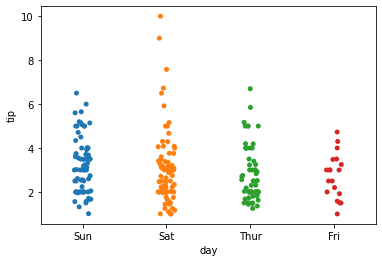

In [34]:
sns.stripplot(data=tips,x='day',y='tip',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

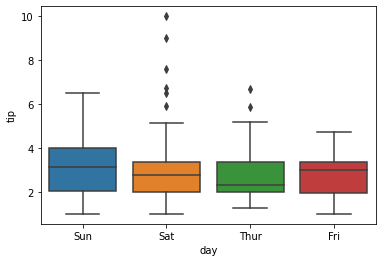

In [35]:
sns.boxplot(data=tips, x='day', y='tip')

- *We can see that the median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday*

**We have already seen that the number of orders at the restaurant tend to be higher during the dinner time as compared to lunch.**

### **Which time of the day brings in higher bill and tip amounts?** 

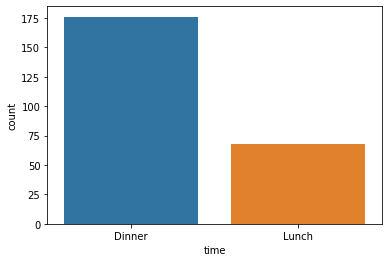

In [36]:
sns.countplot(data=tips, x='time')

- *The number of orders during dinner is nearly 2.5 times the number of orders during lunch*.

**`total_bill`**

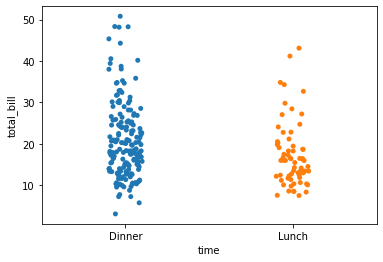

In [37]:
sns.stripplot(data=tips,x='time',y='total_bill',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

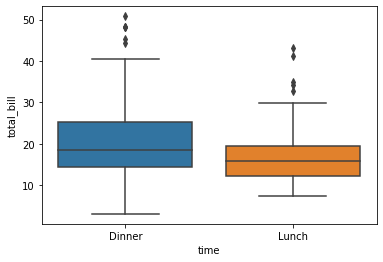

In [38]:
sns.boxplot(data=tips, x='time', y='total_bill')

- *The order count is higher during the dinner time*
- *50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch*

**`tip`**

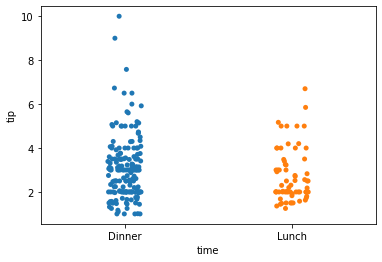

In [39]:
sns.stripplot(data=tips,x='time',y='tip',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

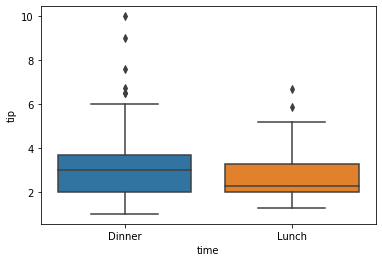

In [40]:
sns.boxplot(data=tips, x='time', y='tip')

- *The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.*

**After doing a thorough analysis of the `day` and `time` columns, let us now move on to the other two categorical colums, `sex` and `smoker`, and try to answer some important business questions.**

### **Ideally the tip amount should not vary with the gender of the bill payer. Is this assumption true with respect to the data provided? What is the count of male and female bill payers visiting each day?**


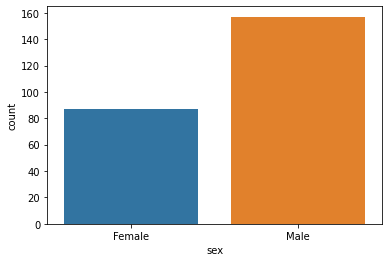

In [41]:
sns.countplot(data=tips, x='sex')

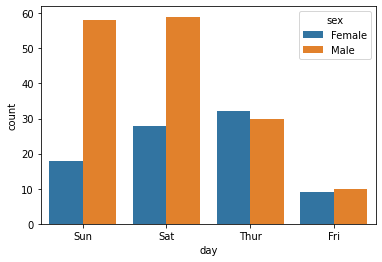

In [42]:
sns.countplot(data=tips, x='day', hue='sex')

- *The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers*
- *On Saturdays and Sundays, the the number of male bill payers is significantly higher than the number of female bill payers.*

**Let us now see how the tip amount varies with respect to the gender of the bill payer** 

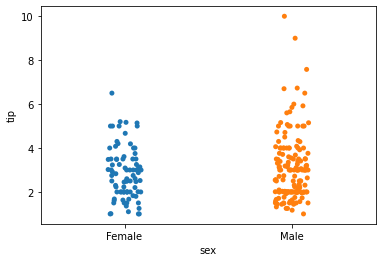

In [43]:
sns.stripplot(data=tips, x='sex', y='tip')

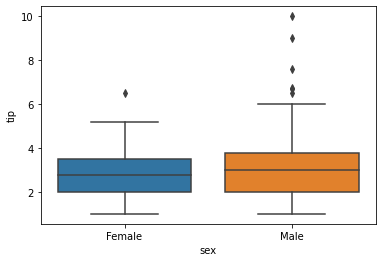

In [44]:
sns.boxplot(data=tips, x='sex', y='tip')

- *The median value for `tip` is almost equal for both the genders.*
- *Males have a lot of outliers i.e far away values, giving higher tips.*

**Let us carry out a similar sort of analysis for `smoker` to know the distribution between the classes and see its relationship with `tip`.**

### **What is the distribution between smokers and non-smokers? Do they have any relationship with 'tip'?**


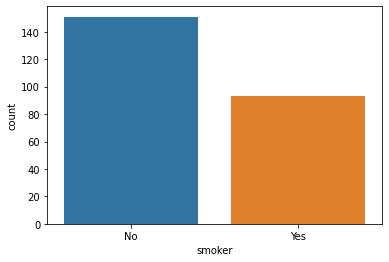

In [45]:
sns.countplot(data=tips, x='smoker')

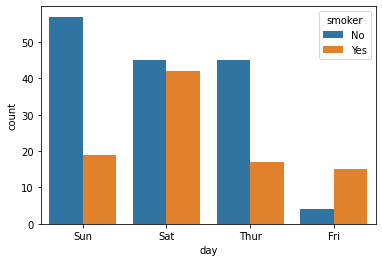

In [46]:
sns.countplot(data=tips, x='day', hue='smoker')

- *The tables which included non-smokers is around 60 more than those which included smokers*
- *The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays*
- *Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers*

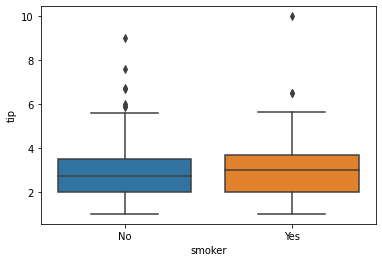

In [47]:
sns.boxplot(data=tips, x='smoker', y='tip')

- *There is no relation between smoking status and tips, the median is almost the same in both the classes`*



### **Insights**

- *The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars.*
- *The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).*
- *The group size varies from 1 person to 6 people.*
- *50%  of the people pay less than 20 dollars for overall bill and 50% of the people pay less than 3 dollars as tip.*
- *There is a linear relationship between `total_bill` and `tip` i.e higher the billing amount, higher is the tip amount and vice versa.*
- *The relationship between `total_bill` and `tip` is linear with respect to both the genders, day and time*
- *Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers*
- *With respect to size of the group, this relationship between `total_bill` and `tip` gets constant as the size of the group increases.*
- *The number of orders is higher on weekends as compared to the weekdays. The order count is higher during the dinner time as compared to lunch*
- *The median billing amount on Saturdays and Sundays is higher than the other two days.*
- *The median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday*
- *50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch*
- *The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.*
- *The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers*
- *On Saturdays and Sundays, the number of male bill payers is significantly higher than the number of female bill payers.*
- *The median value for `tip` is almost equal for both the genders.*
- *Males have a lot of outliers i.e far away values, giving higher tips.*
- *The tables which included non-smokers is around 60 more than those which included smokers*
- *The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays*
- *Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers*
- *There is no relation between smoking status and tips, the median is almost the same in both the classes*